# Preprocessing

In [1]:
# Import our dependencies
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading and Preprocessing our Data

In [2]:
metadata_df = pd.read_csv("resources/metadata.csv", header=None, delimiter=" ")
metadata_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,"4,59",71,89,118,139,160,183,222,212,148,...,0,0,0,0,0,0,0,0,1,"0,Sad"
1,"0,144",149,129,114,119,124,125,135,145,141,...,122,115,115,128,113,64,73,77,81,"88,Angry"
2,"4,90",97,105,42,41,41,37,40,36,55,...,91,44,42,48,83,107,105,77,51,"32,Sad"
3,"1,69",72,80,87,95,102,112,123,131,137,...,163,169,178,186,189,192,195,201,208,"215,Disgust"
4,"0,134",135,136,137,142,122,46,47,36,25,...,171,173,180,109,1,4,5,6,5,"5,Angry"


In [3]:
emotions = metadata_df[2303].str.split(",", expand = True)
labels = metadata_df[0].str.split(",", expand = True)

In [4]:
# Create a copy of our metadata dataframe
data_cleaned = metadata_df.copy()

# Drop the now extraneous columns
data_cleaned.drop(data_cleaned.columns[[0, 2303]], axis=1, inplace=True)

# Insert the split columns into their appropriate locations
data_cleaned.insert(loc = 0, column = 0, value = labels[1])
data_cleaned.insert(loc = 2303, column = 2303, value = emotions[0])
data_cleaned.insert(loc = 2304, column = 'Labels', value = labels[0])
data_cleaned.insert(loc = 2305, column = 'Emotions', value = emotions[1])

# Convert the new columns to int
data_cleaned = data_cleaned.astype({0:'int', 2303:'int', 'Labels':'int'})
data_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,2296,2297,2298,2299,2300,2301,2302,2303,Labels,Emotions
0,59,71,89,118,139,160,183,222,212,148,...,0,0,0,0,0,0,1,0,4,Sad
1,144,149,129,114,119,124,125,135,145,141,...,115,128,113,64,73,77,81,88,0,Angry
2,90,97,105,42,41,41,37,40,36,55,...,42,48,83,107,105,77,51,32,4,Sad
3,69,72,80,87,95,102,112,123,131,137,...,178,186,189,192,195,201,208,215,1,Disgust
4,134,135,136,137,142,122,46,47,36,25,...,180,109,1,4,5,6,5,5,0,Angry


In [5]:
# Check and confirm our dtypes
data_cleaned.dtypes

0            int64
1            int64
2            int64
3            int64
4            int64
             ...  
2301         int64
2302         int64
2303         int64
Labels       int64
Emotions    object
Length: 2306, dtype: object

In [6]:
# Check each emotion's value_count
data_cleaned['Emotions'].value_counts()

Sad         5126
Angry       5126
Disgust     5126
Fear        5126
Surprise    5126
Neutral     5126
Happy       5126
Name: Emotions, dtype: int64

In [7]:
# Create a copy of our data_cleaned dataframe
data_reduced = data_cleaned.copy()

# Set index to Labels
data_reduced = data_reduced.set_index(['Labels'], drop=False)

# Drop the emotions Angry (0), Disgust (1), Fear (2), Surprise (5), Neutral (6) 
data_reduced = data_reduced.drop([0, 1, 2, 5, 6] , axis=0)

# Rename the 4 (Sad) and 3 (Happy) labels to 1 and 0 respectively
data_reduced['Labels'] = data_reduced['Labels'].replace(4, 1)
data_reduced['Labels'] = data_reduced['Labels'].replace(3, 0)
data_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,2296,2297,2298,2299,2300,2301,2302,2303,Labels,Emotions
Labels,,,,,,,,,,,,,,,,,,,,,
4,59,71,89,118,139,160,183,222,212,148,...,0,0,0,0,0,0,1,0,1,Sad
4,90,97,105,42,41,41,37,40,36,55,...,42,48,83,107,105,77,51,32,1,Sad
4,219,221,222,224,225,226,227,229,230,231,...,17,8,3,31,46,38,59,74,1,Sad
3,51,51,53,50,47,44,41,40,37,37,...,26,59,65,66,64,62,60,56,0,Happy
3,91,118,124,101,97,130,149,147,144,137,...,202,210,202,120,106,106,101,94,0,Happy


           0     1     2     3     4     5     6     7     8     9  ...  2295  \
Labels                                                              ...         
0       5126  5126  5126  5126  5126  5126  5126  5126  5126  5126  ...  5126   
1       5126  5126  5126  5126  5126  5126  5126  5126  5126  5126  ...  5126   
2       5126  5126  5126  5126  5126  5126  5126  5126  5126  5126  ...  5126   
3       5126  5126  5126  5126  5126  5126  5126  5126  5126  5126  ...  5126   
4       5126  5126  5126  5126  5126  5126  5126  5126  5126  5126  ...  5126   
5       5126  5126  5126  5126  5126  5126  5126  5126  5126  5126  ...  5126   
6       5126  5126  5126  5126  5126  5126  5126  5126  5126  5126  ...  5126   

        2296  2297  2298  2299  2300  2301  2302  2303  Emotions  
Labels                                                            
0       5126  5126  5126  5126  5126  5126  5126  5126      5126  
1       5126  5126  5126  5126  5126  5126  5126  5126      5126  
2 

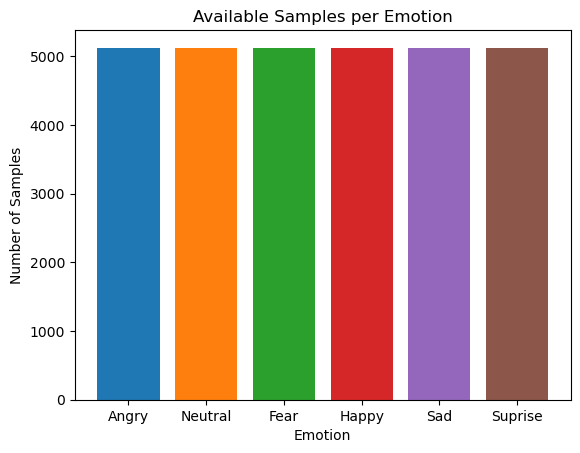

In [9]:
## Plotting the Data Counts 
label_dict = {0:"Angry",1:"Neutral",2:"Fear",3:"Happy",4:"Sad", 5:"Suprise"}
emotion_labels = [label_dict[i] for i in label_dict.keys()]
emotion_counts = [np.sum(data_cleaned["Labels"] == i) for i in range(len(label_dict))]

# Plot the Sample Numbers
[plt.bar(x = emotion_labels[i], height = emotion_counts[i] ) for i in range(len(emotion_labels))] 
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.title('Available Samples per Emotion');

# Data Distribution
data_dist = data_cleaned.groupby('Labels').count()
print(data_dist)

In [8]:
# Save cleaned and reduced dataframe to .csv
data_reduced.to_csv('resources/data_reduced.csv', index=False)